In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
def compute(data_frame, group, group_category):
    average_population = data_frame.groupby(group)['value'].sum()
    average_population = average_population/61
    largest_group = average_population.idxmax()
    largest_group_population = average_population.max()
    total_population = average_population.sum()
    portion_population_largest = (largest_group_population/total_population)*100
    print("Largest " + group_category + " in Singapore is:", end =" ")
    print(largest_group)
    print("Percent of", end =" ")
    print(largest_group, end=" ")
    print("population is:", end =" ")
    print(portion_population_largest)
    df_2 = data_frame[data_frame[group].isin([largest_group])]
    year_population = df_2.groupby('year')['value'].sum()
    population_growth=year_population.diff()
    average_population_growth = population_growth.sum()/60
    print("Average population growth of", end=" ")
    print(largest_group, end=" ")
    print("over the years:", end=" ")
    print(average_population_growth)  
singapore_data = pd.read_csv('singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv')
ethnicity = ['Total Malays', 'Total Chinese','Total Indians','Other Ethnic Groups (Total)']
df_1 = singapore_data[singapore_data['level_1'].isin(ethnicity)]
df_1['value'] = df_1['value'].replace('na',0).astype(int)
compute(df_1,'level_1', 'Ethnic Group')
df3 = singapore_data[singapore_data['level_1'].isin(['Total Residents'])]
df3['value'] = df3['value'].replace('na',0).astype(int)
compute(df3,'level_2', 'Age Group')

Largest Ethnic Group in Singapore is: Total Chinese
Percent of Total Chinese population is: 77.09507726358937
Average population growth of Total Chinese over the years: 47302.96666666667
Largest Age Group in Singapore is: 5  -  9 Years
Percent of 5  -  9 Years population is: 7.555098956516905
Average population growth of 5  -  9 Years over the years: -317.18333333333334


C:\Users\retek\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\retek\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
def compute_high_low_same(data_frame, group_by, group_category):
    year_population=data_frame.groupby(group_by)['value'].sum()
    population_growth=year_population.pct_change()*100 #take a look(recheck)
    population_growth = population_growth.to_frame()
    population_growth.reset_index(inplace = True)
    average_growth_rate = population_growth.groupby(group_by[0])['value'].sum()/60
    average_growth_rate = average_growth_rate.replace([np.inf, -np.inf], np.nan)
    maximum = average_growth_rate.idxmax()
    highest_growth_rate = average_growth_rate.max()
    minimum = average_growth_rate.idxmin()
    lowest_growth_rate = average_growth_rate.min()
    print("Highest growth rate is of "+ group_category + " " + maximum + " which is:",end=" ")
    print(highest_growth_rate)
    print("Lowest growth rate is of "+ group_category + " " + minimum + " which is:",end=" ")
    print(lowest_growth_rate)
    constant_growth = ""
    for index,value in average_growth_rate.items():
        if (math.isnan(float(value))==True):
            continue
        if (int(value)==1) and float(value)%1<0.1:
            constant_growth = index
            constant_growth_value = value
    if not constant_growth:
        print("No " + group_category +" has constant growth")
    else:
        print("Growth rate remained the same for " + group_category + " " + constant_growth + " which is:",end=" ")
        print(constant_growth_value)
compute_high_low_same(df3, ['level_2','year'], 'age group')
compute_high_low_same(df_1, ['level_1','year'], 'ethnic group')
gender = ['Total Male Residents', 'Total Female Residents']
df5 = singapore_data[singapore_data['level_1'].isin(gender)]
df5['value'] = df5['value'].replace('na',0).astype(int)
compute_high_low_same(df5, ['level_1','year'], 'gender group')

Highest growth rate is of age group 70 Years & Over which is: 3.8049232403711795
Lowest growth rate is of age group 5  -  9 Years which is: -0.5980915651016879
Growth rate remained the same for age group 35 - 39 Years which is: 1.0980420714403287
Highest growth rate is of ethnic group Total Chinese which is: 13.585013762157185
Lowest growth rate is of ethnic group Total Indians which is: 0.46573475209552984
Growth rate remained the same for ethnic group Total Malays which is: 1.0564505609094565
Highest growth rate is of gender group Total Female Residents which is: 2.2414003906636313
Lowest growth rate is of gender group Total Male Residents which is: 0.7544512495601353
No gender group has constant growth


C:\Users\retek\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Insight1: Chinese population has grown rapidly from 1957 to 2018


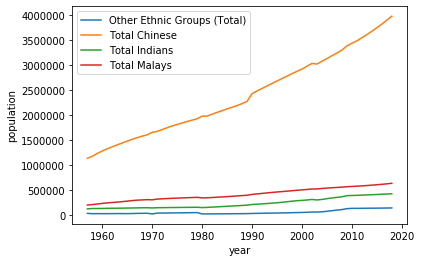

In [6]:
year_ethnic_population = df_1.groupby(['year','level_1'])['value'].sum()
df6 = year_ethnic_population.to_frame()
df6.reset_index(inplace = True)
fig,ax = plt.subplots()
for x in df6.level_1.unique().tolist():
    ax.plot(df6[df6.level_1.isin([x])].year,df6[df6.level_1.isin([x])].value,label=x)
ax.set_xlabel("year")
ax.set_ylabel("population")
ax.legend(loc='best')
print("Insight1: Chinese population has grown rapidly from 1957 to 2018")

Insight2: Total female population has grown over the years, by 2018 more number of female consituted the total population.


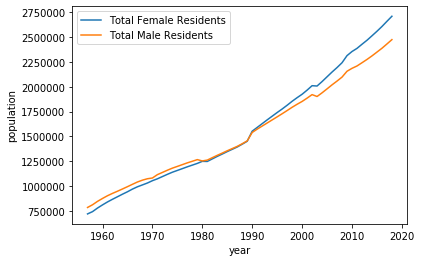

In [7]:
year_gender_population = df5.groupby(['year','level_1'])['value'].sum()
df6 = year_gender_population.to_frame()
df6.reset_index(inplace = True)
fig,ax = plt.subplots()
for x in df6.level_1.unique().tolist():
    ax.plot(df6[df6.level_1.isin([x])].year,df6[df6.level_1.isin([x])].value,label=x)
ax.set_xlabel("year")
ax.set_ylabel("population")
ax.legend(loc='best')
print("Insight2: Total female population has grown over the years, by 2018 more number of female consituted the total population.")

Insight3: Maximum population gap between genders is for the age group 65 years and over and the minimum is for 30-39 years


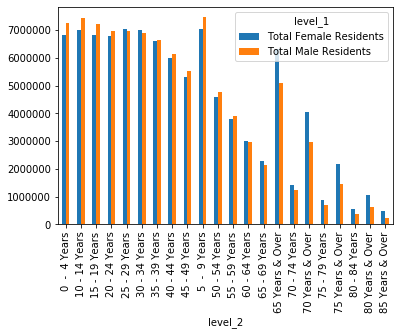

In [8]:
age_gender_population = df5.groupby(['level_1','level_2'])['value'].sum()
df7 = age_gender_population.to_frame()
df7.reset_index(inplace = True)
df7.pivot(index='level_2', columns='level_1', values='value').plot(kind='bar')
print("Insight3: Maximum population gap between genders is for the age group 65 years and over and the minimum is for 30-39 years")